In [1]:
import pandas as pd
import pandas as np
import matplotlib.pyplot as plt
import seaborn as sns

The Post's database is updated regularly as fatal shootings are reported and as facts emerge about individual cases. The Post is seeking assistance in making the database as comprehensive as possible. To provide information about fatal police shootings since Jan. 1, 2015.

Person.Name	String	Full name of the individual or "Unknown" if not reported	"Tim Elliot"

Person.Age	Integer	Age in years of the individual or 0 (zero) if not reported	53

Person.Gender	String	One of Male, Female, or Unknown	"Male"

Person.Race	String	One of Asian, African American, White, Hispanic, Native American, Other, or Unknown.	"Asian"

Incident.Date.Month	Integer	Month (1-12) in which the shooting occurred	1

Incident.Date.Day	Integer	Day (1-31) in which the shooting occurred	2

Incident.Date.Year	Integer	Year (2015-2019) in which the shooting occurred	2015

Incident.Date.Full	String	Date in which shooting occurred (Year/Month/Day)	"2015/01/02"

Incident.Location.City	String	Name of city in which the shooting occurred	"Shelton"

Incident.Location.State	String	Name of U.S. State in which the shooting occurred	"WA"

Factors.Armed	String	Description of any weapon carried by the person (.e., "gun", "knife", "unarmed"); value is "unknown" if not reported.	"gun"

Factors.Mental-Illness	Boolean	True if factors of mental illness were perceived in the person; False otherwise	True

Factors.Threat-Level	String	Threat of person as perceived by police. One of "attack", "undetermined", or "other"; value is "unknown" if not reported.	"attack"

Factors.Fleeing	String	Means by which person was fleeing (e.g., "Car", "Foot") or "Not fleeing"; value is "unknown" if not reported.	"Not fleeing"

Shooting.Manner	String	Manner of person's death: one of "shot" or "shot and Tasered".	"shot"

Shooting.Body-Camera	Boolean	True if police body camera recorded incident; False otherwise.	True


In [ ]:
import pandas as pd
import pandas as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading our data set
shootings = pd.read_csv('/content/police_shootings.csv')
shootings

,Person.Name,Person.Age,Person.Gender,Person.Race,Incident.Date.Month,Incident.Date.Day,Incident.Date.Year,Incident.Date.Full,Incident.Location.City,Incident.Location.State,Factors.Armed,Factors.Mental-Illness,Factors.Threat-Level,Factors.Fleeing,Shooting.Manner,Shooting.Body-Camera
0,Tim Elliot,53,Male,Asian,1,2,2015,2015/01/02,Shelton,WA,gun,True,attack,Not fleeing,shot,True
1,Lewis Lee Lembke,47,Male,White,1,2,2015,2015/01/02,Aloha,OR,gun,True,attack,Not fleeing,shot,True
2,John Paul Quintero,23,Male,Hispanic,1,3,2015,2015/01/03,Wichita,KS,unarmed,True,other,Not fleeing,shot and Tasered,True
3,Matthew Hoffman,32,Male,White,1,4,2015,2015/01/04,San Francisco,CA,toy weapon,True,attack,Not fleeing,shot,True
4,Michael Rodriguez,39,Male,Hispanic,1,4,2015,2015/01/04,Evans,CO,nail gun,True,attack,Not fleeing,shot,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6564,Unknown,0,Male,Unknown,9,7,2021,2021/09/07,Fruit Cove,FL,gun,True,attack,Not fleeing,shot,True
6565,Anthony Cravo,52,Male,Unknown,9,7,2021,2021/09/07,Lufkin,TX,gun,True,attack,Not fleeing,shot,True
6566,Cedric Williams,29,Male,Unknown,9,10,2021,2021/09/10,Oxon Hill,MD,toy weapon,True,other,unknown,shot,True
6567,Desmond Lewis,30,Male,Unknown,9,11,2021,2021/09/11,Shreveport,LA,gun,True,attack,Foot,shot,True


In [ ]:
shootings.shape

(6569, 16)

In [ ]:
shootings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6569 entries, 0 to 6568
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Person.Name              6569 non-null   object
 1   Person.Age               6569 non-null   int64 
 2   Person.Gender            6569 non-null   object
 3   Person.Race              6569 non-null   object
 4   Incident.Date.Month      6569 non-null   int64 
 5   Incident.Date.Day        6569 non-null   int64 
 6   Incident.Date.Year       6569 non-null   int64 
 7   Incident.Date.Full       6569 non-null   object
 8   Incident.Location.City   6569 non-null   object
 9   Incident.Location.State  6569 non-null   object
 10  Factors.Armed            6569 non-null   object
 11  Factors.Mental-Illness   6569 non-null   bool  
 12  Factors.Threat-Level     6569 non-null   object
 13  Factors.Fleeing          6569 non-null   object
 14  Shooting.Manner          6569 non-null  

In [ ]:
# Convert the date_column to datetime
shootings['Incident.Date.Full'] = pd.to_datetime(shootings['Incident.Date.Full'])
shootings.dtypes

Person.Name                        object
Person.Age                          int64
Person.Gender                      object
Person.Race                        object
Incident.Date.Month                 int64
Incident.Date.Day                   int64
Incident.Date.Year                  int64
Incident.Date.Full         datetime64[ns]
Incident.Location.City             object
Incident.Location.State            object
Factors.Armed                      object
Factors.Mental-Illness               bool
Factors.Threat-Level               object
Factors.Fleeing                    object
Shooting.Manner                    object
Shooting.Body-Camera                 bool
dtype: object

In [ ]:
shootings.isnull().sum()

Person.Name                0
Person.Age                 0
Person.Gender              0
Person.Race                0
Incident.Date.Month        0
Incident.Date.Day          0
Incident.Date.Year         0
Incident.Date.Full         0
Incident.Location.City     0
Incident.Location.State    0
Factors.Armed              0
Factors.Mental-Illness     0
Factors.Threat-Level       0
Factors.Fleeing            0
Shooting.Manner            0
Shooting.Body-Camera       0
dtype: int64

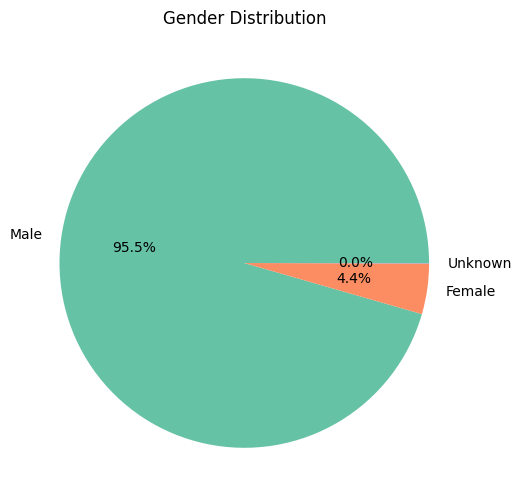

In [ ]:
# Gender distribution
gender_counts = shootings['Person.Gender'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Gender Distribution')
plt.show()

A pie chart depicting the gender distribution, with 4.4% female and 95.5% male.

<ipython-input-14-8d8c3291cce9>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=monthly_incidents.index, y=monthly_incidents.values, marker='o', palette='viridis')


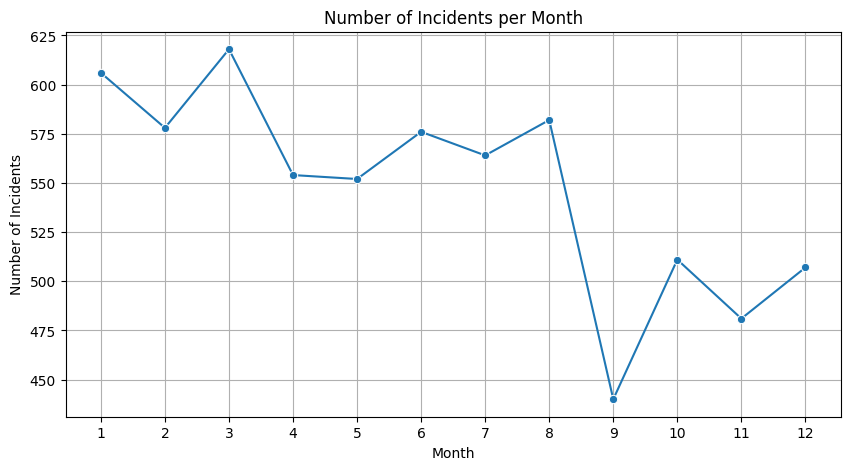

In [ ]:
shootings['Month'] = shootings['Incident.Date.Full'].dt.month

# Calculate the number of incidents per month
monthly_incidents = shootings['Month'].value_counts().sort_index()

# Plotting the data
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_incidents.index, y=monthly_incidents.values, marker='o', palette='viridis')
plt.title('Number of Incidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(monthly_incidents.index)
plt.grid(True)
plt.show()

The above graph illustrates the number of incidents per month, with the highest number of shootings recorded in March at 620 cases. The rate of shootings decreased in April and May, followed by an upward trend in June, July, and August. September saw the lowest rate of shootings, with only 200 cases recorded

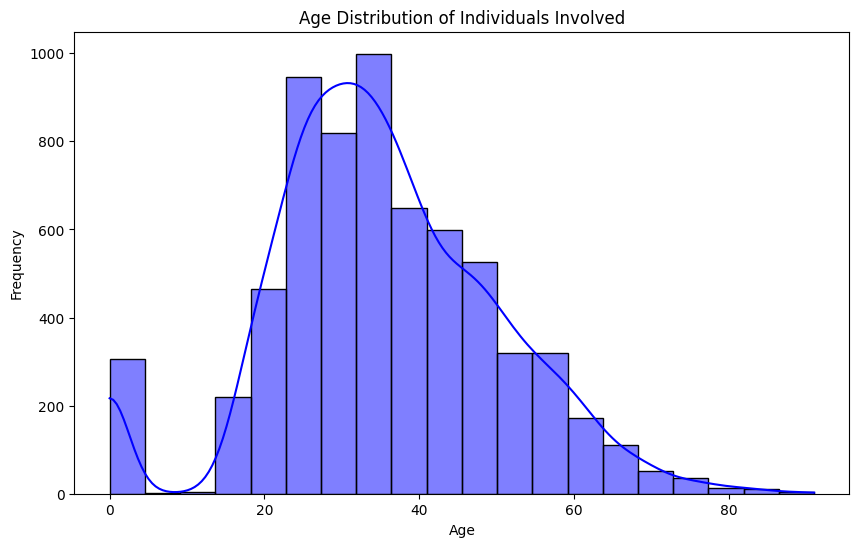

In [ ]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(shootings['Person.Age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution of Individuals Involved')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Shootings predominantly affect individuals in their mid-twenties to forties

<ipython-input-21-9aba53982157>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Person.Race', data=shootings, palette='Set3')


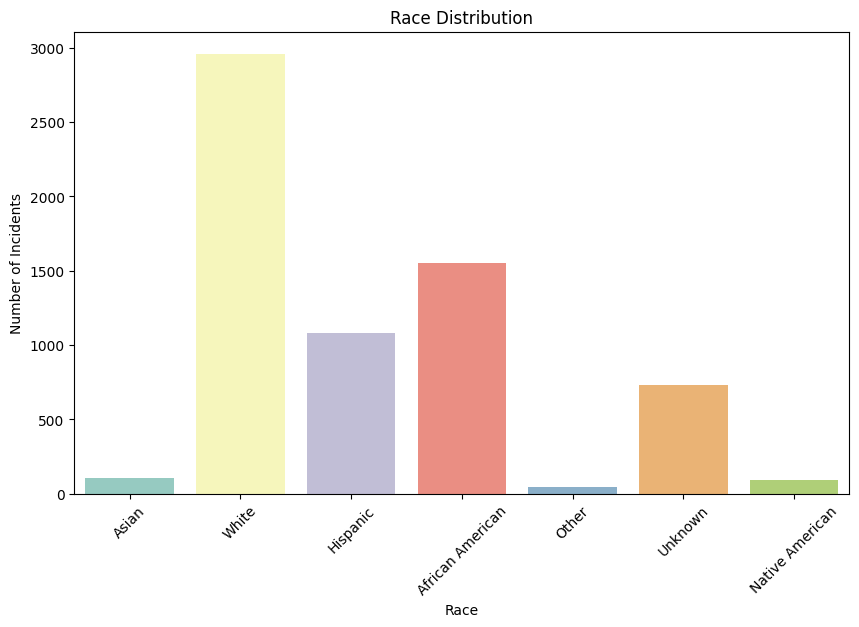

In [ ]:
# Race distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Person.Race', data=shootings, palette='Set3')
plt.title('Race Distribution')
plt.xlabel('Race')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()

In the Race distribution chart above, the White race recorded the highest number of cases with 3,000, followed by African Americans. The number of shootings was significantly lower among Native American, Other, and Asian races.

<ipython-input-5-cb5df12505b5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Factors.Threat-Level', data=shootings, palette='deep')


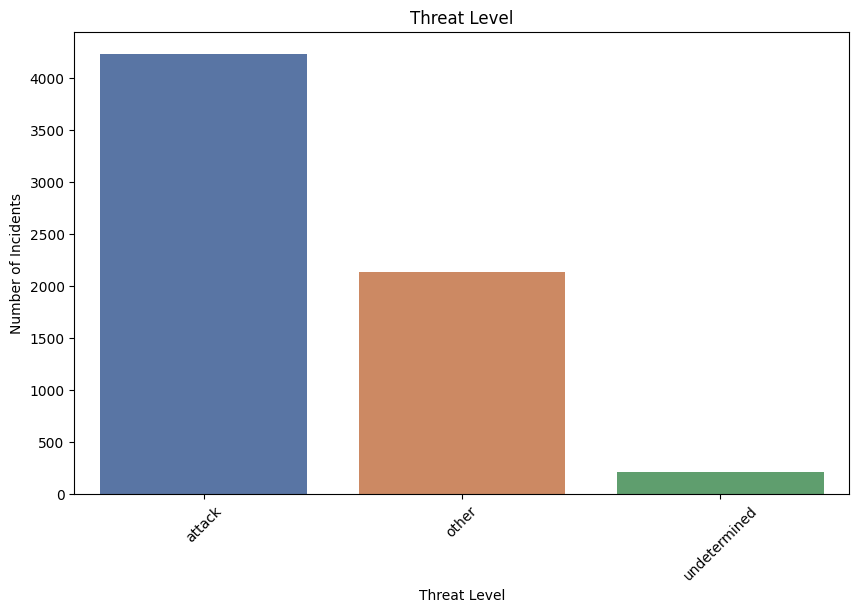

In [ ]:
# Threat level
plt.figure(figsize=(10, 6))
sns.countplot(x='Factors.Threat-Level', data=shootings, palette='deep')
plt.title('Threat Level')
plt.xlabel('Threat Level')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()

<ipython-input-6-2cbdf3db9076>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Shooting.Manner', data=shootings, palette='husl')


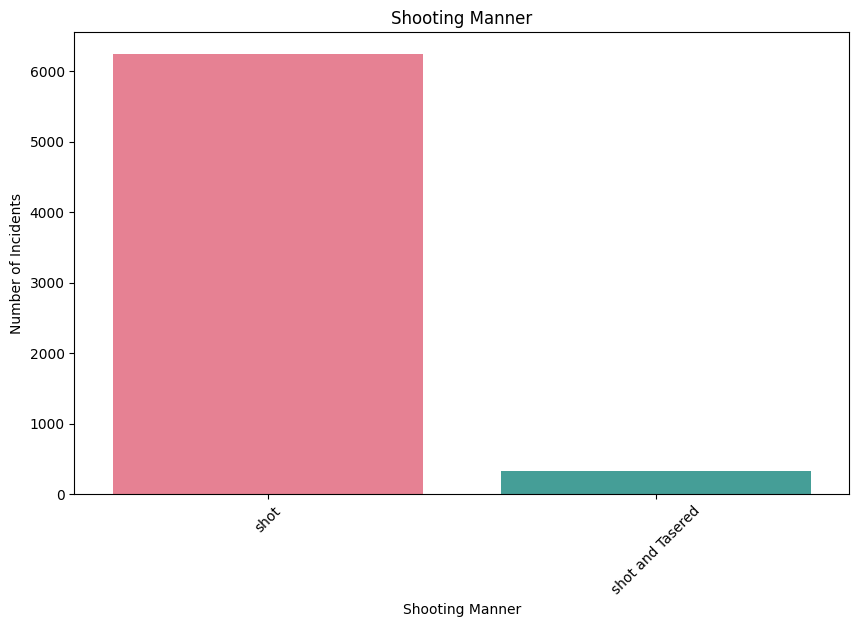

In [ ]:
# Shooting manner
plt.figure(figsize=(10, 6))
sns.countplot(x='Shooting.Manner', data=shootings, palette='husl')
plt.title('Shooting Manner')
plt.xlabel('Shooting Manner')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()

Out of the victims, 6,000 were shot, while a much smaller number were both Tasered and shot

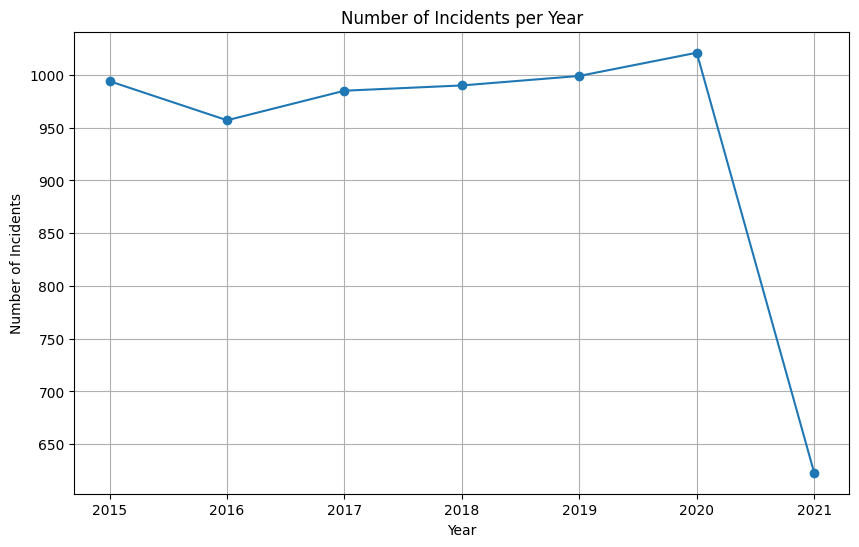

In [ ]:
yearly_counts = shootings['Incident.Date.Year'].value_counts().sort_index()

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', linestyle='-')
plt.title('Number of Incidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.show()

From our analysis of the Number of Incidents per Year line chart above, it's evident that between 2015 and 2020, the minimum reported cases were 950, with a significant surge observed in 2020, reaching an all-time high. Additionally, a notable sharp decline is noticeable in 2021. This decline can be attributed to the global "Black Lives Matter" movement, which gained prominence following the tragic killing of George Floyd in May 2020

<ipython-input-13-7af8fa36a1b7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=incidents_per_city.index, y=incidents_per_city.values, palette='viridis')


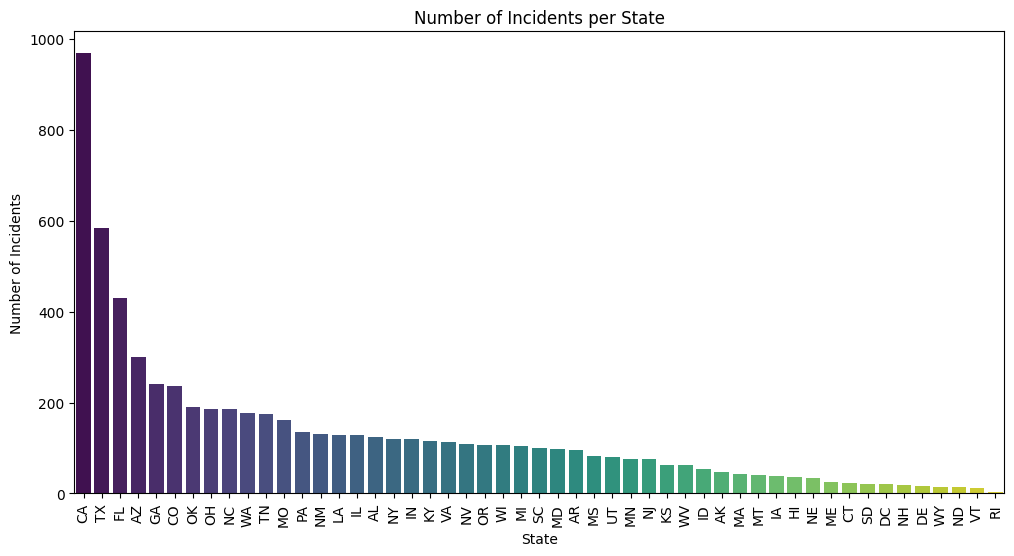

In [ ]:
incidents_per_city = shootings['Incident.Location.State'].value_counts()

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=incidents_per_city.index, y=incidents_per_city.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Number of Incidents per State')
plt.xlabel('State')
plt.ylabel('Number of Incidents')
plt.show()

States like California, Texas, Florida, Arizona, Georgia, and Colorado have the highest numbers of reported police shootings, while states such as Delaware, Wyoming, North Dakota, Vermont, and Rhode Island are at the bottom of the chart.

In [4]:
# Factors Armed distribution
#gender_counts = shootings['Factors.Armed'].value_counts()
#plt.figure(figsize=(10, 6))
#plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
#plt.title('Factors.Armed Distribution')
#plt.show()

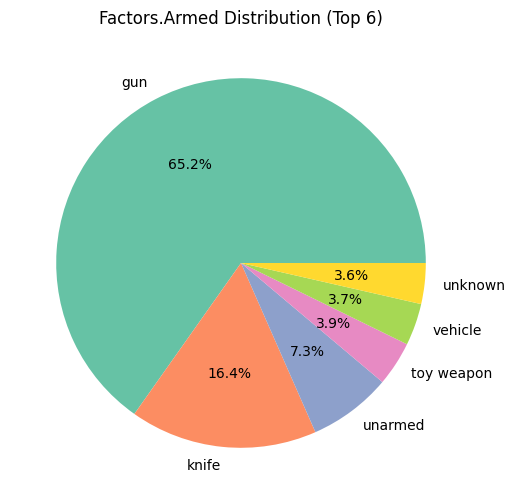

In [3]:
# Factors Armed distribution
gender_counts = shootings['Factors.Armed'].value_counts()
top_6_gender_counts = gender_counts.head(6)
plt.figure(figsize=(10, 6))
plt.pie(top_6_gender_counts, labels=top_6_gender_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Factors.Armed Distribution (Top 6)')
plt.show()

From 2015 to 2021 in the US, 7.3% of individuals shot by the police were unarmed, 65.2% were armed with a gun, 16.4% were armed with a knife, and the remaining were equipped with toy weapons, unknown objects, bottles, and other items.

Observation:


From 2015 to 2021 in the US, 6.4% of individuals shot by the police were unarmed, 57.6% were armed with a gun, 14.5% were armed with a knife, and the remaining were equipped with toy weapons, unknown objects, bottles, and other items.

States like California, Texas, Florida, Arizona, Georgia, and Colorado have the highest numbers of reported police shootings, while states such as Delaware, Wyoming, North Dakota, Vermont, and Rhode Island are at the bottom of the chart.

A pie chart depicting the gender distribution, with 4.4% female and 95.5% male and Shootings predominantly affect individuals in their mid-twenties to forties.

The above graph illustrates the number of incidents per month, with the highest number of shootings recorded in March at 620 cases. The rate of shootings decreased in April and May, followed by an upward trend in June, July, and August. September saw the lowest rate of shootings, with only 200 cases recorded.

In the Race distribution chart above, the White race recorded the highest number of cases with 3,000, followed by African Americans. The number of shootings was significantly lower among Native American, Other, and Asian races.

Out of the victims, 6,000 were shot, while a much smaller number were both Tasered and shot.

From our analysis of the Number of Incidents per Year line chart above, it's evident that between 2015 and 2020, the minimum reported cases were 950, with a significant surge observed in 2020, reaching an all-time high. Additionally, a notable sharp decline is noticeable in 2021. This decline can be attributed to the global "Black Lives Matter" movement, which gained prominence following the tragic killing of George Floyd in May 2020


Recommendations:

Police departments should focus on comprehensive training programs that emphasize de-escalation techniques and non-lethal methods of apprehension. Clear protocols should be established regarding the use of force, particularly in situations involving unarmed individuals.

Given that shootings predominantly affect individuals in their mid-twenties to forties, there should be increased investment in mental health services and crisis intervention training for law enforcement officers. This can help prevent situations from escalating to the point where the use of lethal force becomes necessary.

The significant decrease in police shootings observed in 2021, attributed to the global "Black Lives Matter" movement, highlights the importance of ongoing advocacy and reform efforts. Civil society organizations and policymakers should continue to push for meaningful change within law enforcement agencies to ensure the protection of all individuals' rights and safety.

Law enforcement agencies in states with high numbers of reported police shootings, such as California, Texas, Florida, Arizona, Georgia, and Colorado, should prioritize community engagement initiatives. Building trust between the police and the communities they serve can help reduce the likelihood of confrontational situations.